# calenPIario

https://maddmaths.simai.eu/calenPIario/

https://www.rimosco.it/picalendar/index.php?a=home

## Indice <a class="anchor" id="index"></a>

* [1. Quadrati più cubi](#prob01)
* [2. Un disegno con tanti incroci](#prob02)
* [3. Cancellando cifre](#prob03)
* [4. Pulci che passeggiano](#prob04)
* [5. La busta misteriosa](#prob05)
* [6. La sala P ](#prob06)
* [7. Il Libro ](#prob07)
* [8. Problemi di apici](#prob08)
* [9. L'anno non speciale ](#prob09)
* [10. La torre di potenze ](#prob10)
* [11. La torre di potenze II](#prob11)
* [12. Quadrati accatastati](#prob12)
* [13. Le sei piramidi](#prob13)
* [14. Quante combinazioni](#prob14)
* [15. Tom e Mary](#prob15)

## 1. Quadrati più cubi <a class="anchor" id="prob01"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=5

> Il numero 1000 ha questa caratteristica: può essere scritto come somma di un quadrato più un cubo, perché 
$1000 = 28^2 + 6^3$. Qual è il più grande numero minore di 1000 che ha la stessa proprietà, cioè che può essere scritto come somma di un quadrato più un cubo? I quadrati e i cubi devono essere interi positivi.

[Indice](#index)

In [1]:
print(sorted([i**2+j**3 for i in range(1,int(1000**(1/2)+1)) for j in range(1,int(1000**(1/3)+1)) if i**2+j**3<1000])[-1])

996


## 2. Un disegno con tanti incroci <a class="anchor" id="prob02"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=8

> Quante intersezioni si possono ottenere disegnando opportunamente 4 circonferenze e 2 rette?

* 2 circles = 2 intersections --> N circles = 2 * N * (N-1)/2 intersections
* 1 line + 1 circle = 2 intersections --> M line + N circles = 2 * M * N intersections
* 1 intersections between every pair of M lines --> M * (M-1)/2

[Indice](#index)

In [2]:
def intersections(Ncircles,Nlines):
    return int(2*Ncircles*(Ncircles-1)/2 + 2*Nlines*Ncircles + Nlines*(Nlines-1)/2)

print(intersections(4,2))
print(intersections(3,4))

29
36


## 3. Cancellando cifre <a class="anchor" id="prob03"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=9

> si inizia scrivendo in ordine i numeri da 1 a 60, uno a fianco all'altro - 1 2 3 4 ... 57 58 59 60 - Il problema richiede di cancellarne 100 in modo che il numero che si ottiene compattando le cifre rimaste senza spostarle sia il maggiore possibile.

La mia risposta (trovata a mano) è 99999785960.

Qui sotto una solutione brute force molto elegante di _ilbibi_ (https://pastebin.com/vk9nSAFn)

[Indice](#index)

In [3]:
def check(s,i):
    idx=0 # begin by search from beginning of s string
    for ii in str(i): # loop over digitsof tried value, search their presence in s *in order*
        try:
            # https://docs.python.org/2.7/library/string.html#string.index
            # second argument of index() defined position where sto start looking for substring
            idx=s.index(ii,idx)+1 # search for next digit begins in substring after last found digit!
        except ValueError:
            return False 
    return True

s="".join([str(a) for a in range(1,61)])

start=99999999999
while not check(s,start):
    start=start-1
print(start)

99999785960


## 4. Pulci che passeggiano <a class="anchor" id="prob04"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=10

> Una pulce si muove all'interno di una scacchiera infinita creando una sorta di spirale, come in figura, e numerando progressivamente tutte le caselle che incontra. Una seconda pulce, invece, partendo dalla casella che contiene il numero 1, si sposta facendo 2022 passi verso destra. Quale numero conterrà la casella su cui arriva proprio dopo 2022 passi?

![](calenPIario/immaginepulce.png)

Un problema scopiazzato dal problema 28 di Project Euler :-(

[Indice](#index)

In [4]:
def value(steps=4242):
    count = 1
    n = 1
    side = 1 
    increment = 2 # increment of number on four diagonals for a given spyral layer
    while True:
        side += 2 # square side
        # generates elements on diagonals
        for i in range(4):
            n += increment
            # compute element on right horizontal branch 
            if i == 0:
                j = n-count
                if count==steps:
                    return j
                count +=1
        increment += 2 # new spyral layer
        
value(4242)

71965531

In [5]:
value(2022)

16347871

## 5. La busta misteriosa <a class="anchor" id="prob05"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=11

> Bussa tante volte quanti pi ci sono nel punto di domanda.

[Indice](#index)

![](calenPIario/immaginequadrato.png)

![Soluzione](calenPIario/calenPIario_2022-03-26.jpg)



## 6. La sala P <a class="anchor" id="prob06"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=12

>Tra tutte le possibili soluzioni intere di $x^1-x^2=3141$ scegli quella in cui $x$ e $y$ sono positivi, e $x+y$
ha il valore minore. Quanto vale $x+y$?

[Indice](#index)

Si tratta di un'equazione equivalente a un'equazione di Pell:

https://en.wikipedia.org/wiki/Pell's_equation

per la cui soluzione esistono algoritmi intelligenti (e complessi nel caso generico).

Iniziamo con la soluzione di forza bruta per portare a casa il punto:

In [6]:
def bruteForceProblem6(M):
    return min([ x+y for x in range(M//2) for y in range(M//2) if x**2-y**2-M==0 ])
    
bruteForceProblem6(3141)

349

Passando invece alla soluzione analitica, posso riscrivere l'equazione come:

$x^2-y^2 = M$

$(x+y)(x-y) = M$

da cui segue che $(x+y)=a$ e $(x-y)=b$ devono essere fattori di M, da cui:

$x = \frac{a+b}{2}$

$y = \frac{a-b}{2}$

Posso dunque trovare tutte le soluzioni $(x,y)$ dell'equazione $x^2-y^2 = M$ partendo da ogni possibile coppia $(a,b)$ di fattori di $M$.

In [7]:
def factor(n):
    """Returns all prime factors of a positive integer. Returns n if prime"""
    factors = []
    d = 2 # begin by attempting to divide by 2
    while n > 1:
        while n % d == 0: # check if I can divide n by d, if so store factor and repeat with quotient
            factors.append(d)
            n /= d
        d = d + 1 # increase divident
    return factors

In [8]:
def solveProblem6(M):
    sols = []
    for a in set([1]+factor(M)): # also consider the factors 1 and M
        b = M//a
        x = (a+b)//2
        y = abs((a-b))//2
        sols.append((x,y))
    return sols

sols = solveProblem6(3141)
print(sols)

s0 = min(sols,key=sum)
print(s0,"--> x + y =",sum(s0))

[(1571, 1570), (525, 522), (179, 170)]
(179, 170) --> x + y = 349


## 7. Il Libro <a class="anchor" id="prob07"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=13

> I numeri da 1 a 3141 (estremi compresi) sono scritti in ordine su un cerchio. Partendo da 1, si cerchia un numero saltando di 225 in 225 (1, 226, 451, 676, e così via, proseguendo lungo il cerchio). Si va avanti finché non si raggiunge un numero che è già stato cerchiato. Quando questo accade, quanti sono i numeri che non sono stati cerchiati?

[Indice](#index)

In [9]:
def solveProblem7BruteForce(n=3141,d=225):
    numbers = [i for i in range(1,n+1)]
    p = 0
    circled = []
    while True:
        if numbers[p] in circled:
            break
        circled.append(numbers[p])
        p = (p+d)%len(numbers)
    return len(numbers)-len(circled)

solveProblem7BruteForce(3141,225)

2792

### Soluzione analitica

Se $d$ è un divisore di $n$, troverò un numero cerchiaro dopo 1 giro, dopo averne cerchiati $n/d$.

Altrimenti mi serviranno $g = \textrm{MCD}(n,d)$ giri per trovare un numero già cerchiato, dopo i quali $n/g$ numeri saranno stati cerchiati.

Se $n$ e $d$ sono primi tra loro, tutti i numeri verranno cerchiati.

In [10]:
from math import gcd

def solveProblem7(n=3141,d=225):
    g = gcd(n,d)
    return n-n//g

solveProblem7(3141,225)

2792

In [11]:
n = 3141
for d in range(220,230):
    print(n,d,gcd(n,d),solveProblem7BruteForce(n,d),solveProblem7(n,d))

3141 220 1 0 0
3141 221 1 0 0
3141 222 3 2094 2094
3141 223 1 0 0
3141 224 1 0 0
3141 225 9 2792 2792
3141 226 1 0 0
3141 227 1 0 0
3141 228 3 2094 2094
3141 229 1 0 0


# 8. Problemi di apici  <a class="anchor" id="prob08"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=14

> Stavo scrivendo al computer un testo, e volevo scrivere il numero $2^a 9^b$, ma ho dimenticato gli apici e ho scritto il numero di quattro cifre $2a9b$. Però mi è andata bene: il numero scrtto in maniera errata è comunque uguale a quello che volevo scrivere come prodotto di due potenze. Qual è questo numero?

[Indice](#index)

In [12]:
def solveProblem8():
    for a in range(10):
        for b in range(10):
            #n = int("2{}9{}".format(a,b))
            n = 2000+a*100+90+b
            if n==2**a*9**b:
                return n

solveProblem8()

2592

Caso generico $a^b c^d = abcd$

In [13]:
for a in range(10):
    for b in range(10):
        for c in range(10):
            for d in range(10):
                n = 1000*a+100*b+10*c+d
                if n==a**b*c**d:
                    print(n)

2592


##  9. L'anno non speciale  <a class="anchor" id="prob09"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=15

> Il 2022 è un anno speciale: si può scrivere come somma di numeri naturali consecutivi. 2022=504+505+506+507. Pensandoci, anche il 2021 è un anno speciale. 2021=26+27+28+...+68. Pensandoci ancora un po', anche il 2020 è speciale. Nel terzo millennio (tra il 2000 e il 3000) c'è un solo anno che non si può esprimere come somma di numeri naturali consecutivi. Quale?

Il numero non può essere dispari: ogni numero dispari $N$ può essere scritto come la somma dei numeri consecutivi $(N-1)/2$ e $(N+1)/2$

[Indice](#index)

In [14]:
mem_sum_m_n = {}

def sum_m_n(n,m):
    '''funzione per calcolare la somma dei numeri consecutivi tra n e m inclusi'''
    if (n,m) in mem_sum_m_n.keys():
        return mem_sum_m_n[(n,m)]
    else:
        s = (m+n)*(m-n+1)//2
        mem_sum_m_n[(n,m)] = s
        return s

print(sum_m_n(504,507))
print(sum_m_n(26,68))

2022
2021


In [15]:
def isSpecial(y):
    '''funzione per verificare se il numero è "speciale"'''
    if y%2==1: # numeri dispari
        return True
    # numeri pari
    for n in range(1,y+1): 
        for m in range(n+1,y+1):
            t = sum_m_n(n,m)
            if t>y:
                break
            if y==t:
                return True, n, m
    return False
            
isSpecial(2020)

(True, 31, 70)

In [16]:
def solveProblem9(nmin=2000,nmax=3000):
    return [ y for y in range(nmin,nmax+1,2) if not isSpecial(y) ] # itero solo sui numeri pari 

solveProblem9()

[2048]

### Soluzione analitica

Un numero _dispari_ è sempre speciale: ogni numero dispari $N$ può infatti essere scritto come la somma dei numeri consecutivi $(N-1)/2$ e $(N+1)/2$.

Perché un numero $N$ _pari_ possa essere speciale, deve poter essere scritto come la somma di $M$ interi consecutivi, dove $M$ può essere pari o dispari. Nel caso $M$ sia pari, allora $N$ è divisibile per la somma del'intero più piccolo e quello più grande della sequenza di $M$ numeri, e questa somma è dispari per definizione. Se $M$ è dispari, allora $N$ è divisibile per $M$. In entrambi i casi, perché $N$ pari sia speciale è necessario che abbia almeno un fattore dispari.

**Ne segue che le potenze di 2 non possono essere speciali.**

Nell'esempio, l'unica potenzia di 2 tra 2000 e 3000 è $2^{11} = 2048$.

In [17]:
solveProblem9(2,3000)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

## 10. La torre di potenze  <a class="anchor" id="prob10"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=16

> $9^{8^{7^{6^{5^{4^{3^{2^1}}}}}}}$ è un numero molto grande. Quali sono le sue ultime due cifre?

Osservo che le ultime cifre di ogni potenza di 9 si ripetono con periodicità pari a 10, di ogni esponente precedente mi serve dunque solo propagare l'ultima cifra significativa.

[Indice](#index)

In [18]:
a = 9
for n in range(0,21): # powers from 0 to 20
    #digits = int(str(a**n)[-2:])
    digits = a**n % 100
    print("{:d}^({:2d}) = {:20d} {:2d}".format(a,n,a**n,digits))

9^( 0) =                    1  1
9^( 1) =                    9  9
9^( 2) =                   81 81
9^( 3) =                  729 29
9^( 4) =                 6561 61
9^( 5) =                59049 49
9^( 6) =               531441 41
9^( 7) =              4782969 69
9^( 8) =             43046721 21
9^( 9) =            387420489 89
9^(10) =           3486784401  1
9^(11) =          31381059609  9
9^(12) =         282429536481 81
9^(13) =        2541865828329 29
9^(14) =       22876792454961 61
9^(15) =      205891132094649 49
9^(16) =     1853020188851841 41
9^(17) =    16677181699666569 69
9^(18) =   150094635296999121 21
9^(19) =  1350851717672992089 89
9^(20) = 12157665459056928801  1


Osservo anche che l'ultima cifra di ogni potenza delle altre basi 2-8 si ripete con periodicità uguale o inferiore a 10, per cui mi basta propagare solo la cifra meno significativa del risultato dell'esponenziazione precedente.

Partendo da questa osservazione, posso salvare i pattern delle ultime due cifre delle potenza di ogni base tra 1 e 9 per ogni esponente tra 0 e 9 (anche se per 2-8 mi basterebbe solo l'ultima!), e poi propagare soltanto le potenze dell'ultima cifra del risultato precedente:

In [19]:
a = 1
for n in range(2,10):
    nn = str(n**a)[-2:]
    print("{}^(...{}) = ...{}".format(n,a,nn))
    a = int(nn[-1])

2^(...1) = ...2
3^(...2) = ...9
4^(...9) = ...44
5^(...4) = ...25
6^(...5) = ...76
7^(...6) = ...49
8^(...9) = ...28
9^(...8) = ...21


## 11. La torre di potenze II  <a class="anchor" id="prob11"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=17

> $98^{97^{96^{95^{...^{4^{3^{2^1}}}}}}}$ è un numero molto grande. Quali sono le sue ultime due cifre?

Considerando le basi da 98 in giù, i pattern delle ultime due cifre delle possibili potenze si ripetono come già per le basi da 9 a 2, ma con una **periodicità a volte più grande di 10**. Siccome la periodicità delle ultime due cifre non può essere superiore a 100 la soluzione del problema precedente funziona a patto di propagare le ultime 2 cifre di ogni potenza, che di fatto corrisponde a farne il **modulo 100**.

Posso ulteriormente semplificare il problema cercando una base per cui le ultime due cifre si ripetano con una periodicità pari a 1 (i.e. sempre le stesse), e, nel caso la periodicità segua alcuni elementi non periodici, verificando che l'esponente precedente sia più grande di queste cifre (ovvio se la base è grande e all'inizio della "torre").

Nel caso specifico questa base è 90, la cui periodicità delle 2 cifre 00 inizia dall'esponente 2. Visto inoltre che la periodictà delle potenze di 91 è 10 con nessun elemento precedente, posso anche semplicemente partire dall'esponente esponente 0 per 91, visto che l'unica cifra significativa dell'esponente di 91 che che conta è l'ultima, ed è sempre 0 per tutte le potenze di 90 esclusa $90^0$ (che non può verificarsi nel problema in questione).

[Indice](#index)

In [20]:
for a in range(98,1,-1):
    n = 0
    digits = []
    while True:
        pow_a_n = a**n % 100
        if pow_a_n in digits:
            print("Base {:2d}: power last 2 digits pattern cycle = {:2d} after {:d} elements".format(a,len(digits)-digits.index(pow_a_n),digits.index(pow_a_n)))
            break 
        digits.append(pow_a_n)
        n += 1
    if len(digits)-digits.index(pow_a_n)==1:
        print("Found base with periodicity 1!")
        break

Base 98: power last 2 digits pattern cycle = 20 after 2 elements
Base 97: power last 2 digits pattern cycle = 20 after 0 elements
Base 96: power last 2 digits pattern cycle =  5 after 1 elements
Base 95: power last 2 digits pattern cycle =  2 after 2 elements
Base 94: power last 2 digits pattern cycle = 10 after 2 elements
Base 93: power last 2 digits pattern cycle =  4 after 0 elements
Base 92: power last 2 digits pattern cycle = 20 after 1 elements
Base 91: power last 2 digits pattern cycle = 10 after 0 elements
Base 90: power last 2 digits pattern cycle =  1 after 2 elements
Found base with periodicity 1!


### Soluzione "estesa"

Modifica della soluzione del problema 10 per tenere in conto le ultime due cifre di ogni esponenziazione:

In [21]:
a = 1
for n in range(2,99):
    nn = n**a % 100
    print("{:2d}^(...{:2d}) = ...{:2d}".format(n,a,nn))
    a = nn

 2^(... 1) = ... 2
 3^(... 2) = ... 9
 4^(... 9) = ...44
 5^(...44) = ...25
 6^(...25) = ...76
 7^(...76) = ... 1
 8^(... 1) = ... 8
 9^(... 8) = ...21
10^(...21) = ... 0
11^(... 0) = ... 1
12^(... 1) = ...12
13^(...12) = ...81
14^(...81) = ...64
15^(...64) = ...25
16^(...25) = ...76
17^(...76) = ...81
18^(...81) = ...68
19^(...68) = ...41
20^(...41) = ... 0
21^(... 0) = ... 1
22^(... 1) = ...22
23^(...22) = ...29
24^(...29) = ...24
25^(...24) = ...25
26^(...25) = ...76
27^(...76) = ...61
28^(...61) = ...28
29^(...28) = ...61
30^(...61) = ... 0
31^(... 0) = ... 1
32^(... 1) = ...32
33^(...32) = ...61
34^(...61) = ...84
35^(...84) = ...25
36^(...25) = ...76
37^(...76) = ...41
38^(...41) = ...88
39^(...88) = ...81
40^(...81) = ... 0
41^(... 0) = ... 1
42^(... 1) = ...42
43^(...42) = ...49
44^(...49) = ... 4
45^(... 4) = ...25
46^(...25) = ...76
47^(...76) = ...21
48^(...21) = ...48
49^(...48) = ... 1
50^(... 1) = ...50
51^(...50) = ... 1
52^(... 1) = ...52
53^(...52) = ...41
54^(...41) =

### Soluzione "ottimizzata"

Parto dalla base 91 e con esponente 0, dopo aver osservato che la periodicità delle sue potenze è 10 e dunque dipende solo dall'ultima cifra dell'esponente precedente, e che le potenze di 90 finiscono sempre con 0 tranne quando l'esponente è 0, che è un caso che posso escludere per questo problema!

In [22]:
a = 0 
for n in range(91,99):
    nn = n**a % 100
    print("{:2d}^(...{:2d}) = ...{:2d}".format(n,a,nn))
    a = nn

91^(... 0) = ... 1
92^(... 1) = ...92
93^(...92) = ... 1
94^(... 1) = ...94
95^(...94) = ...25
96^(...25) = ...76
97^(...76) = ...21
98^(...21) = ...48


## 12. Quadrati accatastati  <a class="anchor" id="prob12"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=18

[Indice](#index)

![](calenPIario/quadrati.png)

![Soluzione](calenPIario/calenPIario_2022-04-18.jpg)

## 13. Le sei piramidi  <a class="anchor" id="prob13"></a>

https://www.rimosco.it/picalendar/index.php?a=problem&p=19

> Si sceglie un punto all'interno di un cubo e lo si collega con i suoi sei vertici, formando sei piramidi aventi come basi le facce del cubo. I volumi di cinque delle sei piramidi sono 2, 5, 10, 11 e 14. Qual è il volume della sesta piramide?

Volume piramide: $V = \frac{1}{3} Bh$ ($B$ = base, $h$ = altezza)

Ovunque sia piazzato il punto all'interno del cubo, la somma dei volumi di due piramide opposte è sempre:

$V_1 + V_2 = \frac{1}{3} B (h_1 + h_2) = \frac{1}{3} B \sqrt{B}$

dove $B$ è la superficie di una faccia del cubo, $\sqrt{B} = h_1 + h_2$ il suo lato, e $h_1$ e $h_2$ sono le altezze delle due piramidi.

Dati i cinque valori forniti dal problema, devo dunque trovare due coppie la cui somma dia lo stesso risultato:

- 2 + 14 = 16
- 5 + 11 = 16

Mi resta allora il valore 10, dal che deduco che **la sesta piramide deve avere volume 6** (perché 10 + 6 = 16).

Il lato del cubo $l = \sqrt{B}$ può essere calcolato come:

$16 = \frac{1}{3} B \sqrt{B} \to 48 = l^3 \to l = \sqrt[3]{48} = 2 \sqrt[3]{6}$

[Indice](#index)

## 14. Quante combinazioni  <a class="anchor" id="prob14"></a>

> Un lucchetto ha la combinazione di 4 cifre, da 0000 a 9999. Sappiamo che la somma delle prime due cifre è uguale alla somma delle altre due. Quante combinazioni soddisfano i requisiti?

[Indice](#index)

###  Soluzione di forza bruta 

In [23]:
c = 0
for i in range(10000):
    n = [ int(d) for d in str(i).rjust(4,'0') ]
    if n[0]+n[1]==n[2]+n[3]:
        c += 1
print(c)

670


### Soluzione un po' più elegante

Costruisco gli insiemi dei numeri tra 00 e 99 la cui somma delle cifre ha lo stesso valore, poi conto per ogni somma le possibili combinazioni che danno vita un numero di 4 cifre che soddisfa l'enunciato del problema, che è pari al quadrato del numero di numeri la cui somma delle cifre ha lo stesso valore (perché valgono tanto le combinazioni con la stessa coppia di numeri ma in posizioni diverse - e.g. 1221 e 2112 - quanto la combinazione che accoppi due volte lo stesso numero -- e.g. 1212)

In [24]:
from collections import defaultdict

digitSum = defaultdict(list)

for i in range(100):
    s = i//10+i%10
    digitSum[s].append(i)

In [25]:
digitSum

defaultdict(list,
            {0: [0],
             1: [1, 10],
             2: [2, 11, 20],
             3: [3, 12, 21, 30],
             4: [4, 13, 22, 31, 40],
             5: [5, 14, 23, 32, 41, 50],
             6: [6, 15, 24, 33, 42, 51, 60],
             7: [7, 16, 25, 34, 43, 52, 61, 70],
             8: [8, 17, 26, 35, 44, 53, 62, 71, 80],
             9: [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
             10: [19, 28, 37, 46, 55, 64, 73, 82, 91],
             11: [29, 38, 47, 56, 65, 74, 83, 92],
             12: [39, 48, 57, 66, 75, 84, 93],
             13: [49, 58, 67, 76, 85, 94],
             14: [59, 68, 77, 86, 95],
             15: [69, 78, 87, 96],
             16: [79, 88, 97],
             17: [89, 98],
             18: [99]})

In [26]:
c = 0
for s in digitSum.keys():
    l = len(digitSum[s])
    c += l*l
print(c)

670


### Soluzione analitica

Vista la distribuzione dei numeri le somma delle cui cifre da lo stesso risultato, la soluzione può essere riscritta analiticamente come:

$\sum_{i=1}^{10} i^2 + \sum_{i=1}^{9} i^2 $

Siccome:

$\sum_{i=1}^{n} i^2 = \frac{n(n+1)(2n+1)}{6}$

La soluzione analitica è dunque:

$\frac{10 \cdot 11 \cdot 21}{6} + \frac{9 \cdot 10 \cdot 19}{6}$

In [27]:
10*11*21//6 + 9*10*19//6

670

In [28]:
def sumSquare(n):
    return n*(n+1)*(2*n+1)//6

def sumSquareLoop(n):
    s = 0
    for i in range(1,n+1):
        s += i*i
    return s

sumSquare(10)+sumSquare(9), sumSquareLoop(10)+sumSquareLoop(9)

(670, 670)

## 15. Tom e Mary  <a class="anchor" id="prob15"></a>

> Se sommi il quadrato dell'età di Tom all'età di Mary, ottieni 62. Ma se sommi il quadrato dell'età di Mary all'età di Tom, ottieni 176. Quanto vale la somma dell'età di Tom e dell'età di Mary?

### Soluzione "manuale"

$\left\{ \begin{eqnarray} t^2 + m & = & 62 \\ t + m^2 & = & 176 \\ \end{eqnarray} \right.$

Il sistema risulta in un'equazione di quarto grado, per esempio:

$(176-m^2)^2 + m = 62 $

$m^4 - 352 m^2 + m + 30914 = 0 $

che non provo nemmeno a risolvere (e poi, come si risolvono le euquazioni di quarto grado? Boh...), visto che delle quattro soluzioni ce ne sono alcune in cui almeno uno tra $m$ e $t$ è negativo, e a me interessano interi positivi visto l'enunciato del problema. Cerco allora "a mano" le soluzioni intere positive, considerando che devono verificarsi $t<\sqrt{62}<8$ e $m<\sqrt{176}<14$. Rapidamente trovo:

$t = 7, m = 13 \to t+m =20$

### Soluzione di forza bruta per soluzioni intere positive

In [10]:
def M(t):
    return 62 - t*t

def T(m):
    return 176 - m*m

In [11]:
from math import sqrt 

for t in range(int(sqrt(62))+1,0,-1):
    for m in range(int(sqrt(176))+1,0,-1):
        if M(t)==m and T(m)==t:
            print(t,m,t+m)

7 13 20


### Soluzioni reali

Ci sono altre tre solutioni reali con almeno uno dei valori negativo, che corrispondono alle intersezioni delle due parabole rappresentate della equazioni del sistema:

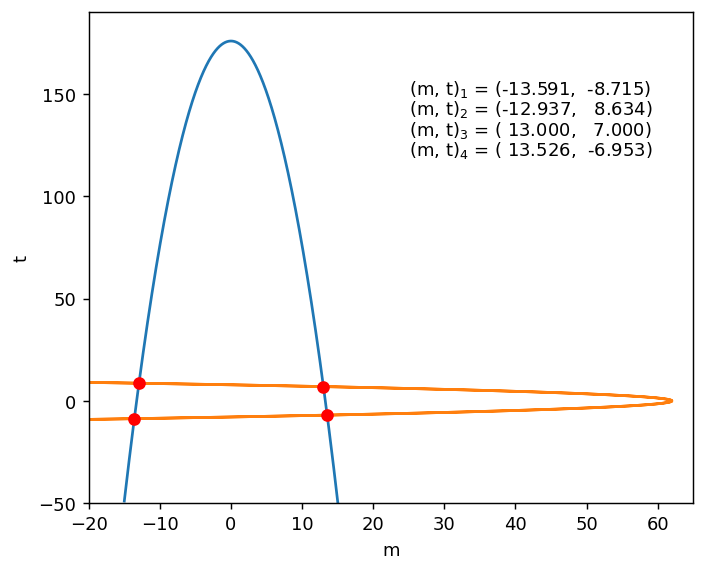

In [12]:
import matplotlib.pyplot as plt
import numpy as np

m = np.arange(-15.,16.,0.001)

plt.figure(figsize=(6,5),dpi=130)

plt.plot(m,T(m),'-')
plt.plot(M(T(m)),T(m),'-')
plt.xlim(-20.,65.)
plt.ylim(-50.,190.)

plt.xlabel('m')
plt.ylabel('t')

# find intersection indices
idx = np.argwhere(np.diff( np.sign( M(T(m)) - m ) )).flatten() 
plt.plot(m[idx], T(m)[idx], 'ro')

j = 0
for i in idx:
    s = "(m, t)$_{{{}}}$ = ({:7.3f}, {:7.3f})".format(j+1,round(m[i],3),round(T(m[i]),3))
    plt.text(25,150-j*10,s)
    j += 1

plt.show()